In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('d3.csv', sep=';')
df = df.reset_index(drop=True)
df = df.drop('timestamp', axis=1)

choc = df[df['product'] == 'CHOCOLATE']['mid_price']
strawb = df[df['product'] == 'STRAWBERRIES']['mid_price']
roses = df[df['product'] == 'ROSES']['mid_price']
basket = df[df['product'] == 'GIFT_BASKET']['mid_price']


combined = 6 * strawb + 4 * choc + roses

choc = choc.to_list()
strawb = strawb.to_list()
roses = roses.to_list()
basket = basket.to_list()

lis = [strawb[i]*6 + choc[i]*4 + roses[i] for i in range(len(strawb))]


# create new dataframe
df2 = pd.DataFrame()
df2['combined'] = lis
df2['combined'] = df2['combined'] + 380
df2['basket'] = basket


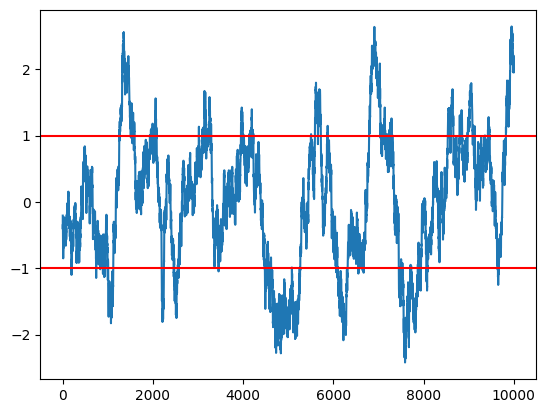

In [134]:
spread = df2['combined'] - df2['basket']
sd = np.std(spread)
mean = np.mean(spread)
zscores = (spread - mean) / sd

# histogram
# plt.hist(df2['zscores'], bins=10)
# plt.xlabel('Z-Score')
# plt.ylabel('Frequency')

zscores.rolling(window=20).mean().plot()
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=-1, color='r', linestyle='-')

In [135]:
df2 = df2.rolling(window=31).mean()


[191, 192, 194, 195, 196, 739, 740, 741, 997, 998, 999, 1000, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1029, 1035, 1038, 1039, 1055, 1057, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1075, 1078, 1096, 1097, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1295, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1344, 1345, 1346, 1367, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1397, 1399, 1401, 1402, 1403, 1456, 1460, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1502, 1503, 1504, 1505, 1506, 1507, 1509, 1510, 1511, 1513, 1514, 1515, 1582, 2029, 2031, 2043, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2079, 2081, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 24

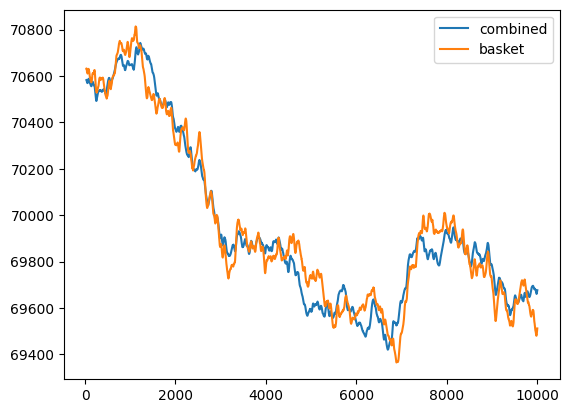

In [136]:
df2.plot()
times = []

for i in range(101, len(df2)):
    dc = df2['combined'][i] - df2['combined'][i-1]
    db = df2['basket'][i] - df2['basket'][i-1]
    if dc == 0 or db == 0:
        continue
    dc /= abs(dc)
    db /= abs(db)
    if dc == -db and abs(zscores[i]) > 1:
        times.append(i)
        continue

print(times)